In [74]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [75]:
# import all from /raw_data/
# TODO concat all files in /raw_data/ into one dataframe
df_acc = pd.read_csv(os.getcwd() + "/raw_data/accelerometer/acc_test.csv")
df_gyro = pd.read_csv(os.getcwd() + "/raw_data/gyroscope/gyro_test.csv")

In [76]:
# Cut off the readings when one sensor is started before the other
print(df_acc.shape, df_gyro.shape)

if df_acc.shape[0] > df_gyro.shape[0]:
    df_acc = df_acc.iloc[df_acc.shape[0] - df_gyro.shape[0]:, :]
else:
    df_gyro = df_gyro.iloc[df_gyro.shape[0] - df_acc.shape[0]:, :]

print(df_acc.shape, df_gyro.shape)

(123, 7) (105, 7)
(105, 7) (105, 7)


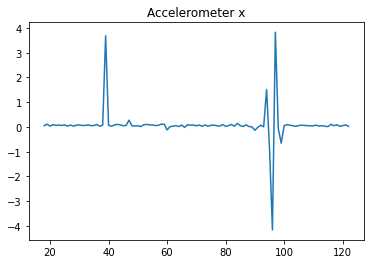

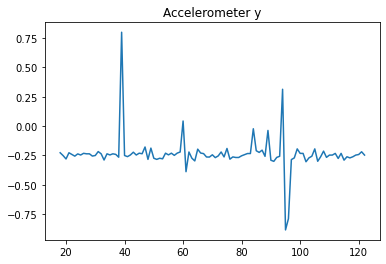

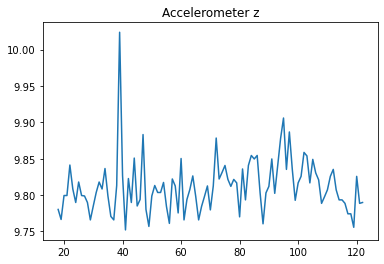

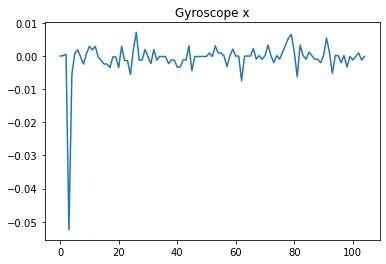

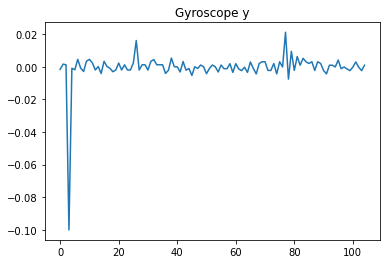

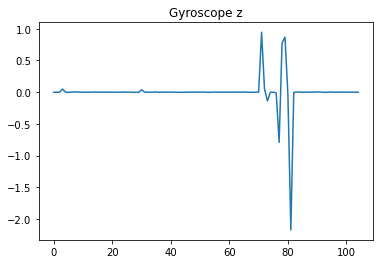

In [85]:
for df, name in zip([df_acc, df_gyro], ["Accelerometer", "Gyroscope"]):
    plt.plot(df["x"])
    plt.title(name + " x")
    plt.show()
    plt.plot(df["y"])
    plt.title(name + " y")
    plt.show()
    plt.plot(df["z"])
    plt.title(name + " z")
    plt.show()

In [78]:
current_payload = None
payload_change_indices = []
print("Payload: ", end="")
for index, reading in enumerate(df_acc.values):
    if reading[6] != current_payload:
        current_payload = reading[6]
        added_symbol = str(current_payload[-1]) if str(current_payload) != 'nan' else None
        
        if added_symbol is not None:
            payload_change_indices.append(index)
            print(added_symbol, end='')

print("\n", "# of readings:", len(df_acc.values))
print(" # of payload changes:", len(payload_change_indices))
print(" Payload change indices:", payload_change_indices)

Payload: Whooooo
 # of readings: 105
 # of payload changes: 7
 Payload change indices: [22, 24, 26, 27, 28, 29, 30]


In [79]:
important_indices = []
N_SURROUNDING = 10
for index in payload_change_indices:
    for i in range(index - N_SURROUNDING , index + N_SURROUNDING):
        if i >= 0 and i < len(df_acc.values) and i < len(df_gyro.values) and not (i in important_indices):
            important_indices.append(i)

print("# of relevant readings:", len(important_indices))
print(important_indices)

df_acc_cut = df_acc.iloc[important_indices]
df_gyro_cut = df_gyro.iloc[important_indices]
print(df_acc_cut.shape)
print(df_gyro_cut.shape)

# of relevant readings: 28
[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
(28, 7)
(28, 7)


In [81]:
# normalize the data?
# transformations?

In [82]:
# output to /processed_data/